1
2
3
4
5


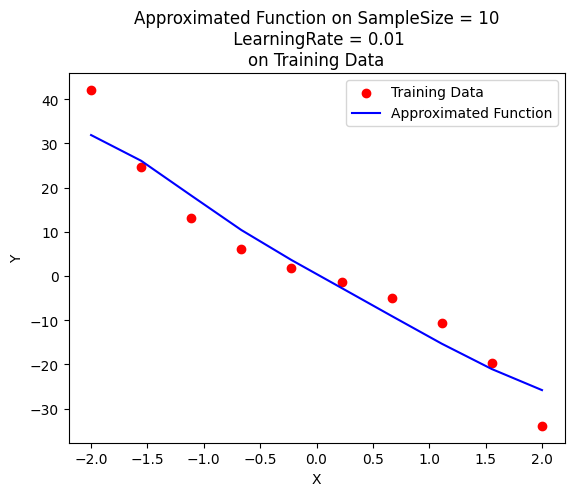

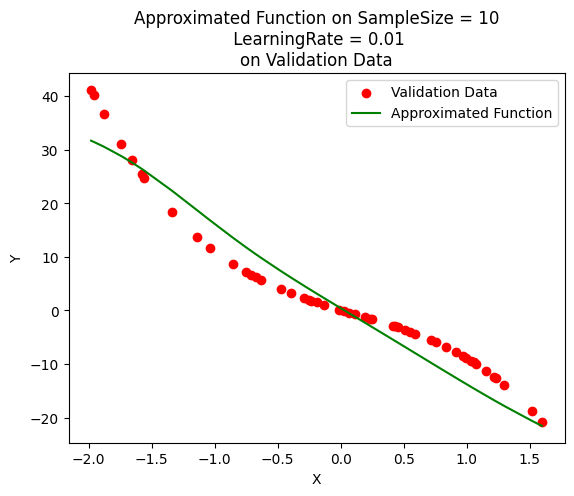

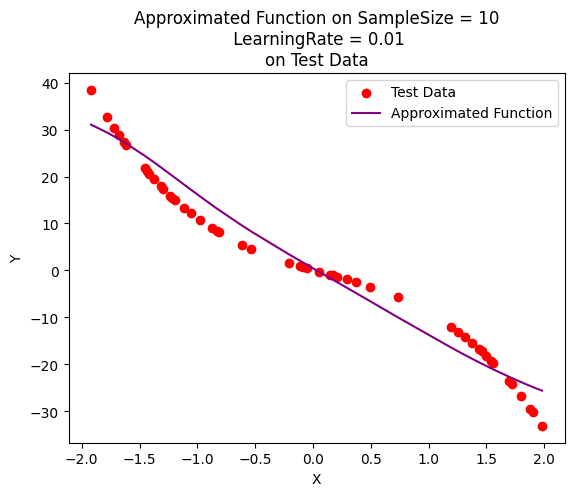

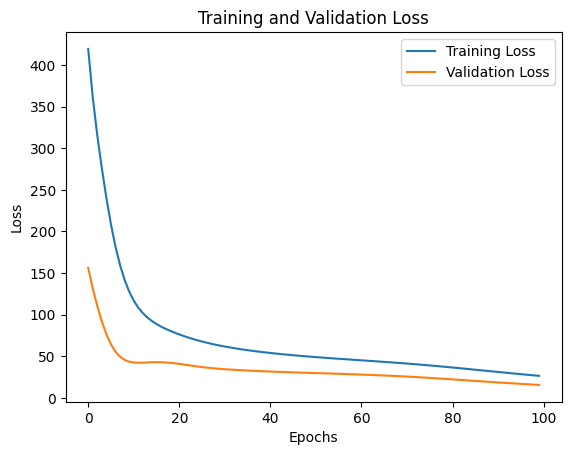

1
2
3
4
5


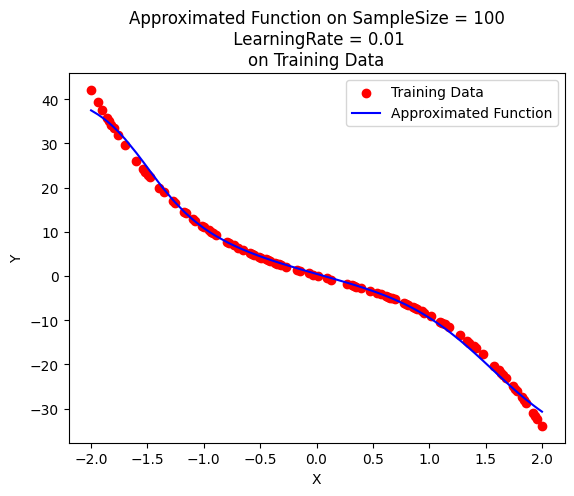

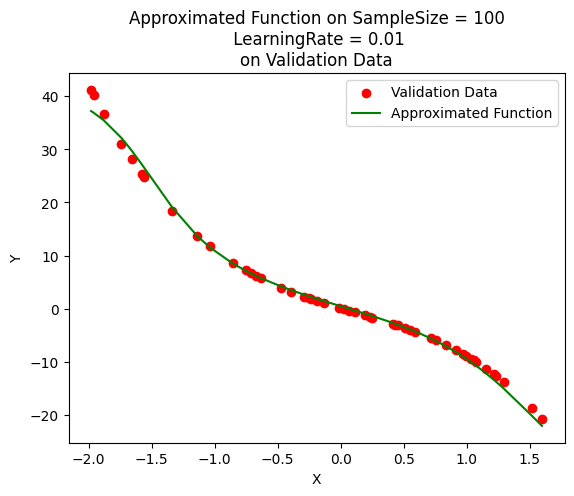

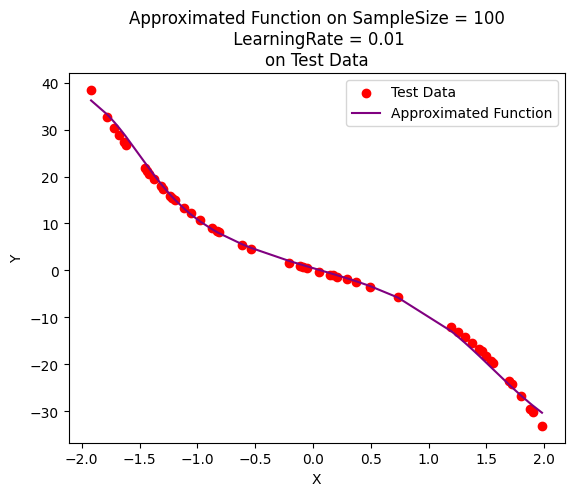

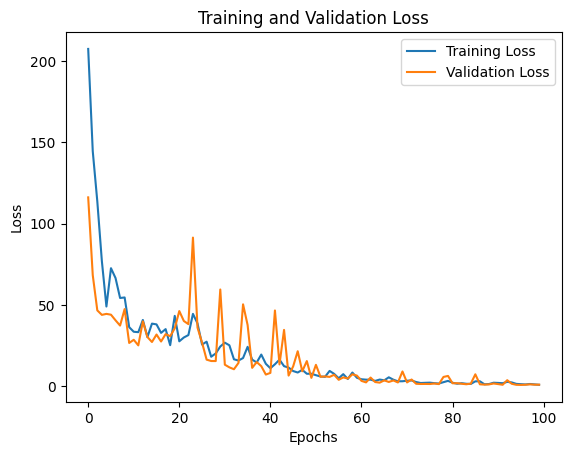

Index Sample Size  Learning Rate  Train Erms  Validate Erms  Test Erms
    1          10           0.01   27.922613      20.963289  26.133185
    2         100           0.01   24.776273      20.381086  25.974028


In [12]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

column_names = [
    "Index",
    "Sample Size",
    "Learning Rate",
    "Train Erms",
    "Validate Erms",
    "Test Erms",
]
table_index = 0
table_df = pd.DataFrame(columns=column_names)


def add_data_to_table(sample_size, learning_rate, train_erms, validate_erms, test_erms):
    row_data = {}
    global table_df
    global table_index
    table_index = table_index + 1
    row_data["Index"] = table_index
    row_data["Sample Size"] = sample_size
    row_data["Learning Rate"] = learning_rate
    row_data["Train Erms"] = train_erms
    row_data["Validate Erms"] = validate_erms
    row_data["Test Erms"] = test_erms
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        table_df = pd.concat(
            [table_df, pd.DataFrame(row_data, index=[0])], ignore_index=True
        )


def print_table():
    print(table_df.to_string(index=False))

def get_N(x):
    N = len(x)
    return N

def get_erms(y, t):
    train_y_mse = tf.reduce_mean(tf.square(t-y))
    train_erms = np.sqrt(train_y_mse)
    return train_erms

def plot_loss(result):

    # Plot training loss
    plt.plot(result.history['loss'], label='Training Loss')
    plt.plot(result.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_data(x, y, pred_y, x_color, y_color, scatter_label, plot_label, x_label, y_label, plot_title):
    plt.scatter(x, y, color=x_color, label=scatter_label)
    plt.plot(x, pred_y, color=y_color, label=plot_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.legend()
    plt.show()

def plot_graphs(train_x, train_y, val_x, val_y, test_x, test_y, sample_size, learning_rate=0.1):

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Define the model architecture
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation='tanh', input_shape=(1,)),
            tf.keras.layers.Dense(1, activation='linear')
        ])
    
    # Compile the model with the specified learning rate
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    # Train the model
    result = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=100, verbose=0)
    
    # Predict outputs for training, validation, and test data
    train_y_pred = model.predict(train_x, verbose=0)
    val_y_pred = model.predict(val_x, verbose=0)
    test_y_pred = model.predict(test_x, verbose=0)
    
    train_erms = get_erms(train_y_pred, train_y)
    validate_erms = get_erms(val_y_pred, val_y)
    test_erms = get_erms(test_y_pred, test_y)
    
    title = "Approximated Function on SampleSize = " + str(sample_size) + "\n LearningRate = " + str(learning_rate) + "\non "

    # Plot the approximated functions obtained using training data
    plot_data(train_x, train_y, train_y_pred, 'r', 'b', 'Training Data', 'Approximated Function', 'X', 'Y', title+'Training Data')

    # Plot the approximated functions obtained using validation data
    plot_data(val_x, val_y, val_y_pred, 'r', 'g', 'Validation Data', 'Approximated Function', 'X', 'Y', title+'Validation Data')
    
    # Plot the approximated functions obtained using test data
    plot_data(test_x, test_y, test_y_pred, 'r', 'purple', 'Test Data', 'Approximated Function', 'X', 'Y', title + 'Test Data')
    
    # Plot training loss
    plot_loss(result)

    add_data_to_table(sample_size, learning_rate, train_erms, validate_erms, test_erms)

    

def main():
    folder_number = "9"
    current_directory = os.getcwd()
    # regression_dataset_1_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 1/"+folder_number+"/"
    regression_dataset_1_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass2/Datasets_for_A1/Regression/Dataset 1/"
        + folder_number
        + "/"
    )

    regression_dataset_1_Train_Sample_1 = (
        regression_dataset_1_path + "Train-" + folder_number + "-Sample-1.csv"
    )
    df = pd.read_csv(regression_dataset_1_Train_Sample_1)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    train_x_1 = sorted_data[:, 1]
    train_y_1 = sorted_data[:, 2]

    regression_dataset_1_Train_Sample_2 = (
        regression_dataset_1_path + "Train-" + folder_number + "-Sample-2.csv"
    )
    df = pd.read_csv(regression_dataset_1_Train_Sample_2)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    train_x_2 = sorted_data[:, 1]
    train_y_2 = sorted_data[:, 2]


    regression_dataset_1_validation = (
        regression_dataset_1_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_validation)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    val_x = sorted_data[:, 1]
    val_y = sorted_data[:, 2]

    regression_dataset_1_test = (
        regression_dataset_1_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_test)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    test_x = sorted_data[:, 1]
    test_y = sorted_data[:, 2]

    accuracy_factor = 100.0
    iterations = 11

    sample_size = get_N(train_x_1)
    for i in range(1, iterations):
        learning_rate = i/accuracy_factor
        plot_graphs(
            train_x_1,
            train_y_1,
            val_x,
            val_y,
            test_x,
            test_y,
            sample_size,
            learning_rate,
        )

    sample_size = get_N(train_x_2)
    for i in range(1, iterations):
        learning_rate = i/accuracy_factor
        plot_graphs(
            train_x_2,
            train_y_2,
            val_x,
            val_y,
            test_x,
            test_y,
            sample_size,
            learning_rate,
        )

    print_table()


if __name__ == "__main__":
    main()